# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data =  pd.merge(mouse_metadata, study_results,how='right') # choosing 'right' to use the keys from mouse_metadata

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']] # We use the double bracket so the output is a dataframe

combined_data.head ()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts() # Assigning a variable to count under Mouse ID
mice_count = len(mice) # Actually counting all the Mouse IDs
mice_count # Showing the outcome of 249 mouse IDs

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique() # Access the dataframe and search for duplicates of the Mouse IDs
dup_id # Showing the outcome of this search

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :] # Setting dup_id_df to equal all the lines (and their data) for each instance of Mouse ID = g989
dup_id_df # Showing this dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(dup_id) == False] # Creating df with all instances where the Mouse ID in the combined data frame is not equal to the duplicated ID 
clean_df.head () # Showing this dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean_df["Mouse ID"].value_counts() # Assigning a variable to count the Mouse IDs in the clean_df
mice_clean_count = len(mice_clean) # Actually counting all the Mouse IDs
mice_clean_count # Showing the outcome of 248 mouse IDs. This is just one less than the previous count because the dup_id was removed


248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_reg_med = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_reg_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_reg_stdev = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_reg_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Create each grouping of mean, median, variance, std dev, and std error for each drug name to be pulled in to a dataframe

summary_stat_table = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,"Median Tumor Volume": drug_reg_med,"Tumor Volume Variance": drug_reg_var,"Tumor Volume Std. Dev.": drug_reg_stdev,"Tumor Volume Std. Err.": drug_reg_sem})

summary_stat_table

C:\Users\kadye\AppData\Local\Temp\ipykernel_23664\2893092315.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\kadye\AppData\Local\Temp\ipykernel_23664\2893092315.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_reg_med = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\kadye\AppData\Local\Temp\ipykernel_23664\2893092315.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify nu

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_table = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem']) 
summary_agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Observed Mouse Timepoints')

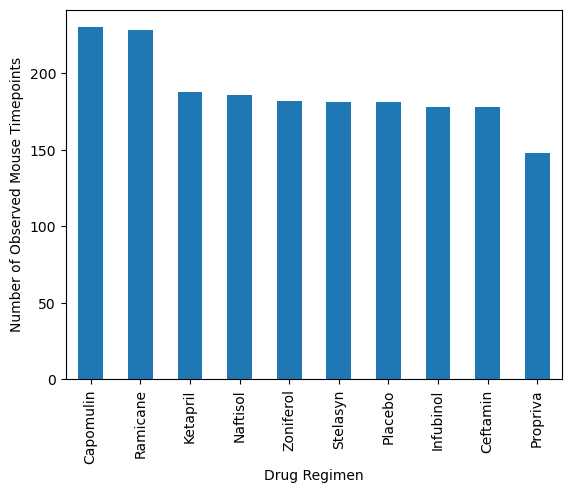

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts() # Count the mice using each drug 
plot_pandas = mice_count.plot.bar(color = 'tab:blue') # Choosing the bar graph with blue bars
plt.xlabel("Drug Regimen") # Name the x-axis
plt.ylabel("Number of Observed Mouse Timepoints") # Name the y-axis


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

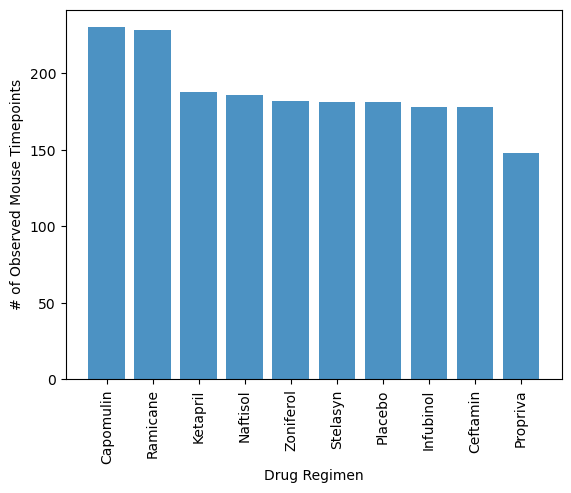

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'tab:blue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

<Axes: ylabel='Sex'>

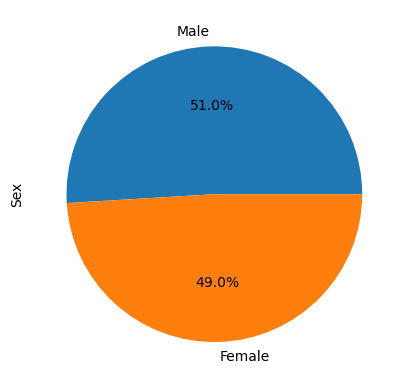

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_by_sex = clean_df["Sex"].value_counts() # Counting the number of each sex in the cleaned data
data_by_sex.plot.pie(autopct = "%1.1f%%") # Plotting as a pie chart with one decimal point in the percentages

Text(0, 0.5, 'Sex')

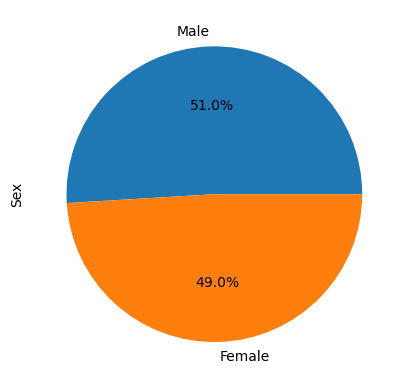

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male'] # Set the labels
sizes = [49.0, 51.0] # Manually setting the sizes of each side of the pie chart
plot = data_by_sex.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse = combined_data.groupby(["Mouse ID"]).max()
each_mouse_cleared = each_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = each_mouse_cleared[['Mouse ID', 'Timepoint']].\
    merge(combined_data, on = ['Mouse ID', 'Timepoint'], how = "left")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#drugs = combined_data[combined_data["Drug Regimen"].isin(treatments)]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Not going to lie, trying to get this to match the outcomes and have the prompts met confused me a bit. 
def get_outliers(regimen):
    regimen_df = merged_df.loc[merged_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_df.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_df.loc[(regimen_df < lower_bound) | (regimen_df > upper_bound)]

    print(f"{regimen}'s potential outliers: {outliers}")
    return regimen_df

capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


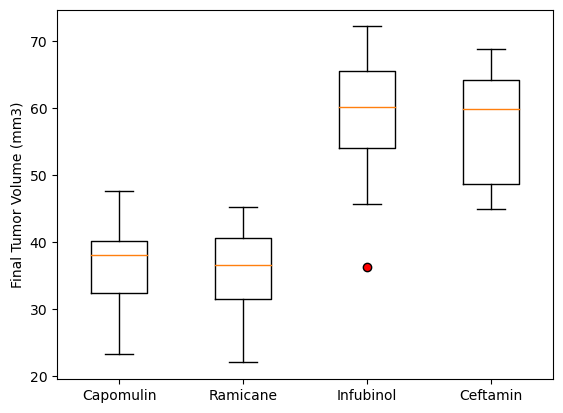

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red")
plt.boxplot([capo, rami, infu, ceft], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

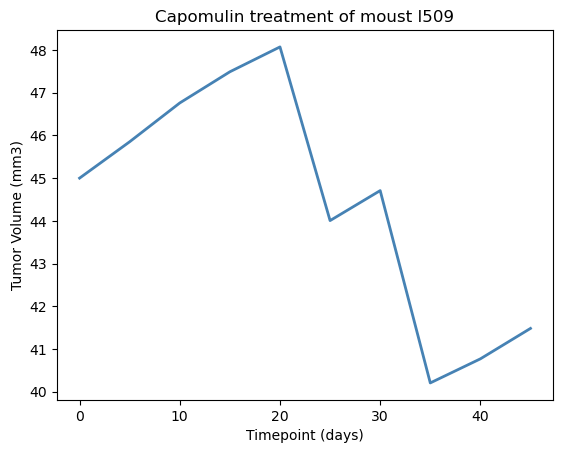

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:] 
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()

# Format and labels

plt.title('Capomulin treatment of moust l509')
plt.plot(x_axis, tumor_size, linewidth = 2, color = "steelblue", label = "Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


C:\Users\kadye\AppData\Local\Temp\ipykernel_23664\3599073985.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capo_vol = capomulin_df.groupby(['Mouse ID']).mean()


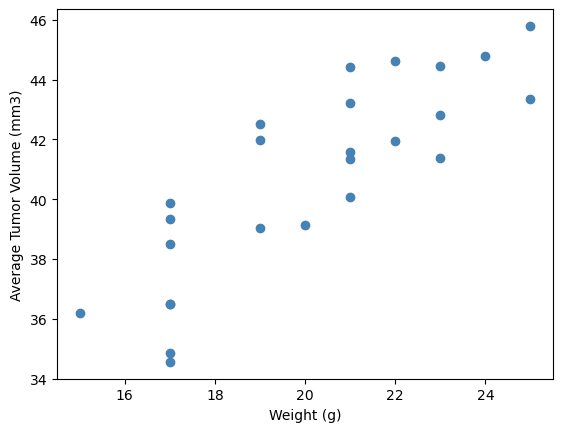

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol = capomulin_df.groupby(['Mouse ID']).mean()


#Format
plt.scatter(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'], color = "steelblue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
marker_size = 15
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


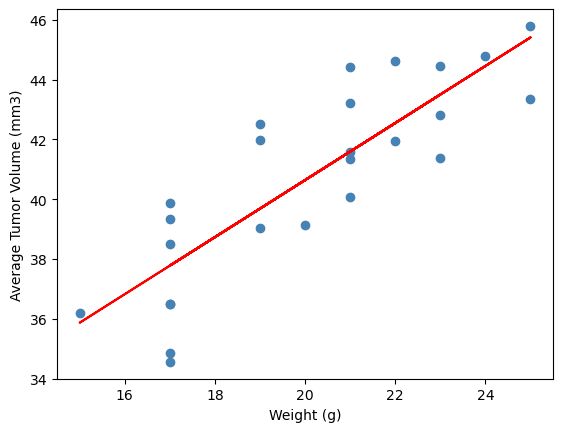

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre_coeff = st.pearsonr(avg_capo_vol['Weight (g)'], avg_capo_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corre_coeff[0], 2)}")

# Calculating the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
values_for_formula = avg_capo_vol["Weight (g)"] * slope + intercept

plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color = 'steelblue')
plt.plot(avg_capo_vol["Weight (g)"], values_for_formula, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()